In [1]:
from IPython.display import Image

## Why trees?

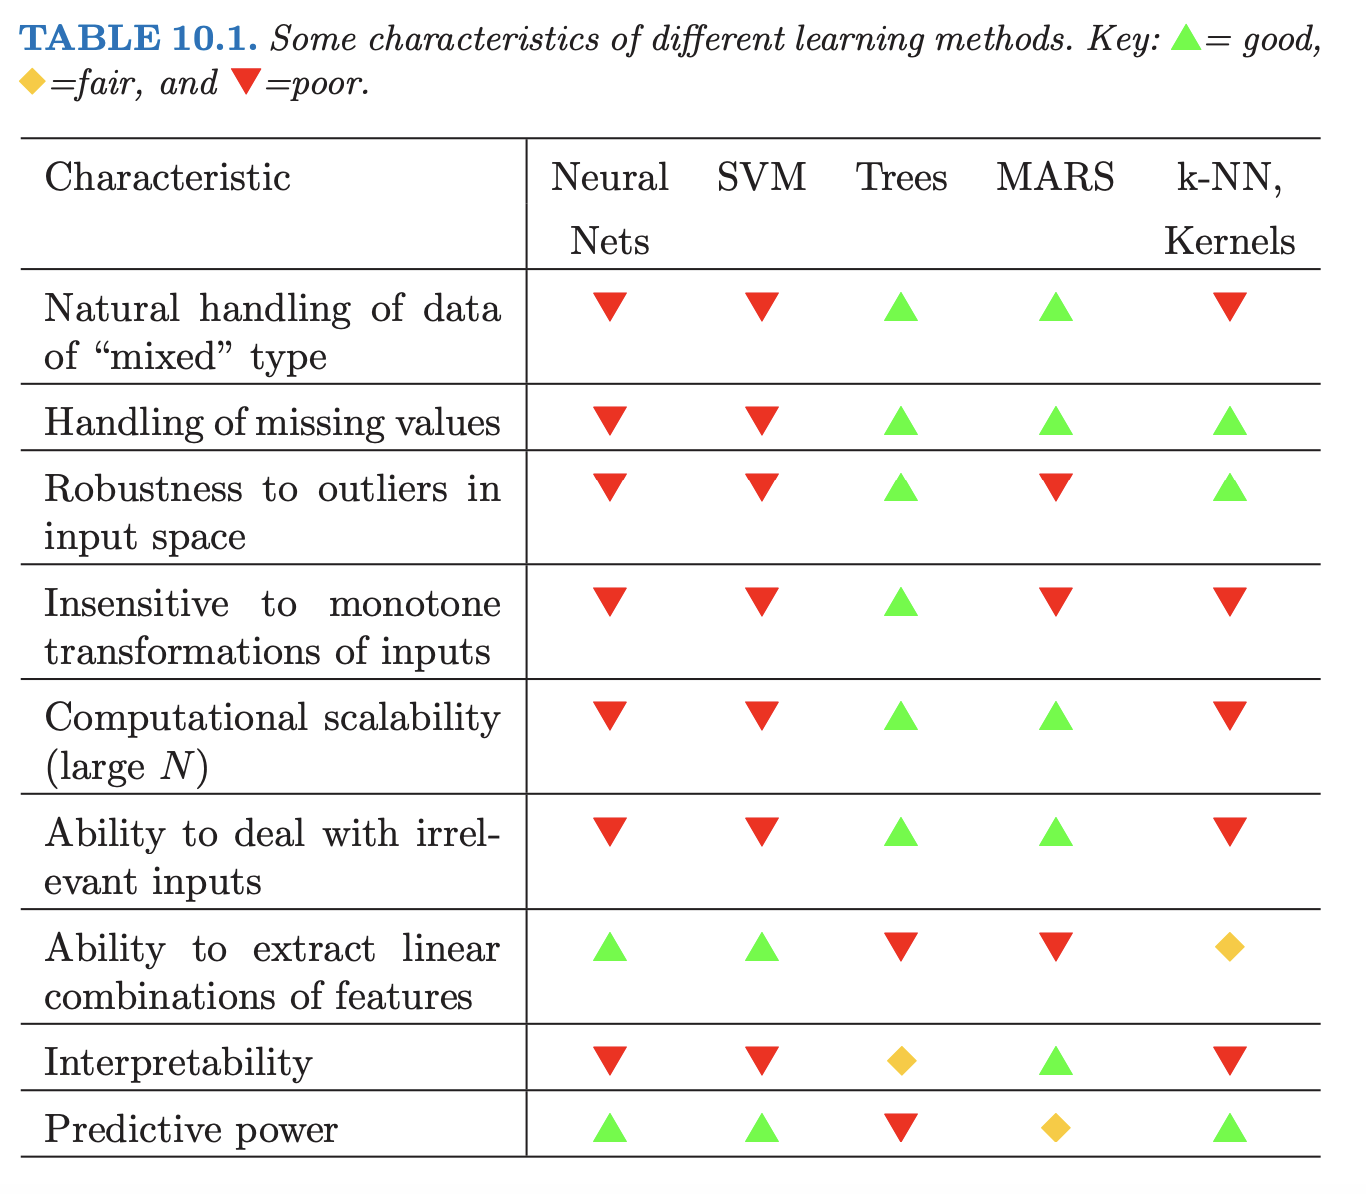

In [2]:
Image("../images/weak_learners_for_boosting.png")
# <img alt="" caption="how data leakage might happen" 
# id="data_leakage" src="../images/weak_learners_for_boosting.png" width="640" height="640">

image taken form [p.370](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

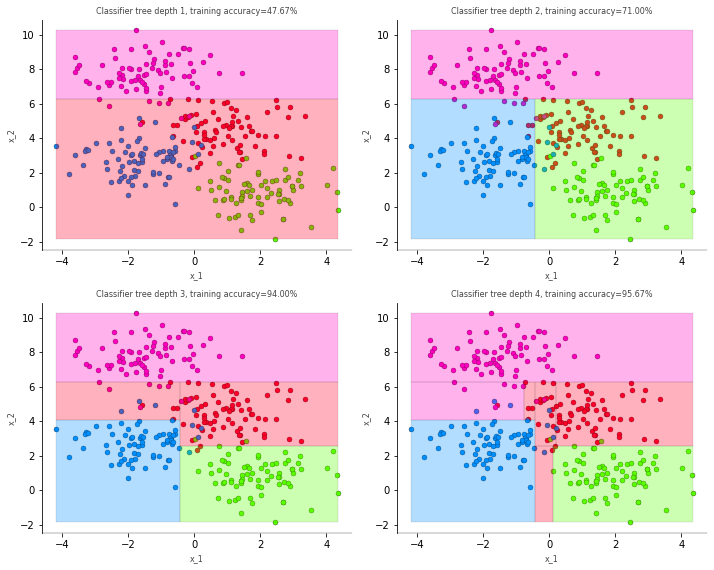

In [35]:
from sklearn.datasets import make_blobs
from sklearn import tree
from dtreeviz.trees import *
import pandas as pd


# little hack for adjusting the color of the regions
base = plt.cm.get_cmap('gist_rainbow')
color_list = base(np.linspace(0, 1, 4))
color_list = color_list * 255
color_list = color_list.astype('int')
new_list = ["#{0:02x}{1:02x}{2:02x}".format(
    color_list[i][0], color_list[i][1], color_list[i][2]) for i in range(len(color_list[0]))]


my_colors = [None] + [new_list[0:i+1] for i in range(len(new_list))]
from dtreeviz.colors import adjust_colors
colors = adjust_colors(None)
colors['classes'] = my_colors
colors['rect_edge'] = '#000000'
colors['edge'] = '#000000'
colors['split_line'] = '#000000'
colors['wedge'] = '#000000'
colors['scatter_edge'] = '#000000'
colors['tesselation_alpha'] = 0.3

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
X = pd.DataFrame(X)
X.columns = ['x_1', 'x_2']
y = pd.DataFrame(y)
y.columns = ['y']
class_names = np.unique(y.values)
y = y['y'].map({n:i for i, n in enumerate(class_names)})

plt.close('all')
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
# for axi, depth  in zip(ax.reshape(-1,).tolist(), range(1, 5)):
#    ct = ctreeviz_bivar(axi, X , y, max_depth=depth,
#                    feature_names = ['x_1', 'x_2'],
#                    class_names=['class1', 'class2', 'class3', 'class4'],
#                    target_name='y',
#                    fontsize=8,
#                    show={'splits','title'})

for axi, depth in zip(ax.reshape(-1,).tolist(), range(1, 5)):
    dt = tree.DecisionTreeClassifier(max_depth=depth)
    dt.fit(X, y)    
    ct = ctreeviz_bivar(dt, X , y,
                    feature_names = ['x_1', 'x_2'],
                    class_names=['class1', 'class2', 'class3', 'class4'],
                    target_name='y',
                    fontsize=8,
                    ax = axi,
                    show={'splits','title'})
    
plt.tight_layout(pad = 1)    
plt.show()

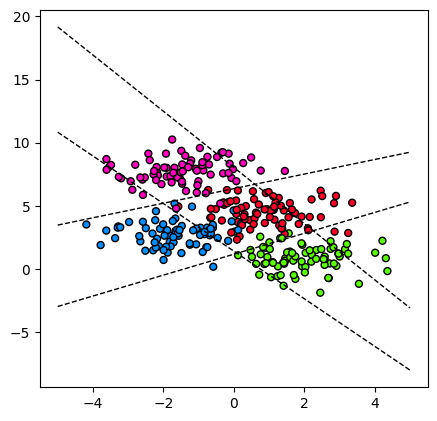

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0, fit_intercept=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5), dpi=100)
cols = ['#ff0028', '#5bff00', '#008fff', '#ff00bf']

plt.scatter(X.x_1, X.x_2, marker="o", c=y.map({0:cols[0], 1:cols[1], 2:cols[2], 3:cols[3]}).tolist(), s=25, edgecolor="k")
for i in np.unique(y):
    y_0 = y == i
    y_0 = y_0.astype(int)
    model.fit(X, y_0)
    b = model.intercept_[0]
    w1, w2 = model.coef_.T
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2

    # Plot the data and the classification with the decision boundary.
    xmin, xmax = -5, 5
    ymin, ymax = -3, 12
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


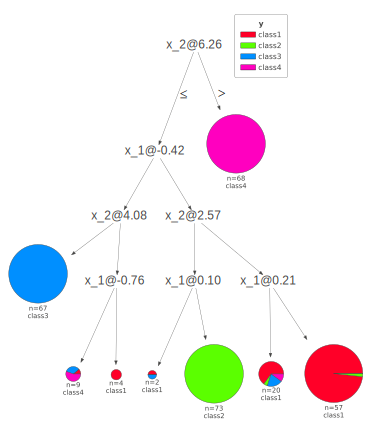

In [4]:
clsfr = tree.DecisionTreeClassifier(max_depth = 4)
clsfr.fit(X.values, y.values)
viz = dtreeviz(clsfr, X, y, target_name='y',
                   feature_names = ['x_1', 'x_2'],
                   class_names=['class1', 'class2', 'class3', 'class4'],
                   fancy = False
                   )
viz

## Random Forest
Random Forest is an example of classifier Bootstrap Aggregation or bagging.
 - trees are not very deep (only stumps)
 - each tree is build on a subsample of data and/or columns
 - results of the individual trees are aggregated (mean)

### Pros of Random Forest:

 - trees can be trained independently: easy to parallelize
 - classification and regression possible
 - all other pros of trees like: handling of missing values, insensitive to outliers, numerical and categorical data, etc..
 - can give a variance estimate (confidence intervals): mean prediction and variance of prediction
 - averaging allows for arbitrary non-linear relationships
 
### Cons of Random Forest:
 - black box algorithm: hard to interpret; (see feature importance)

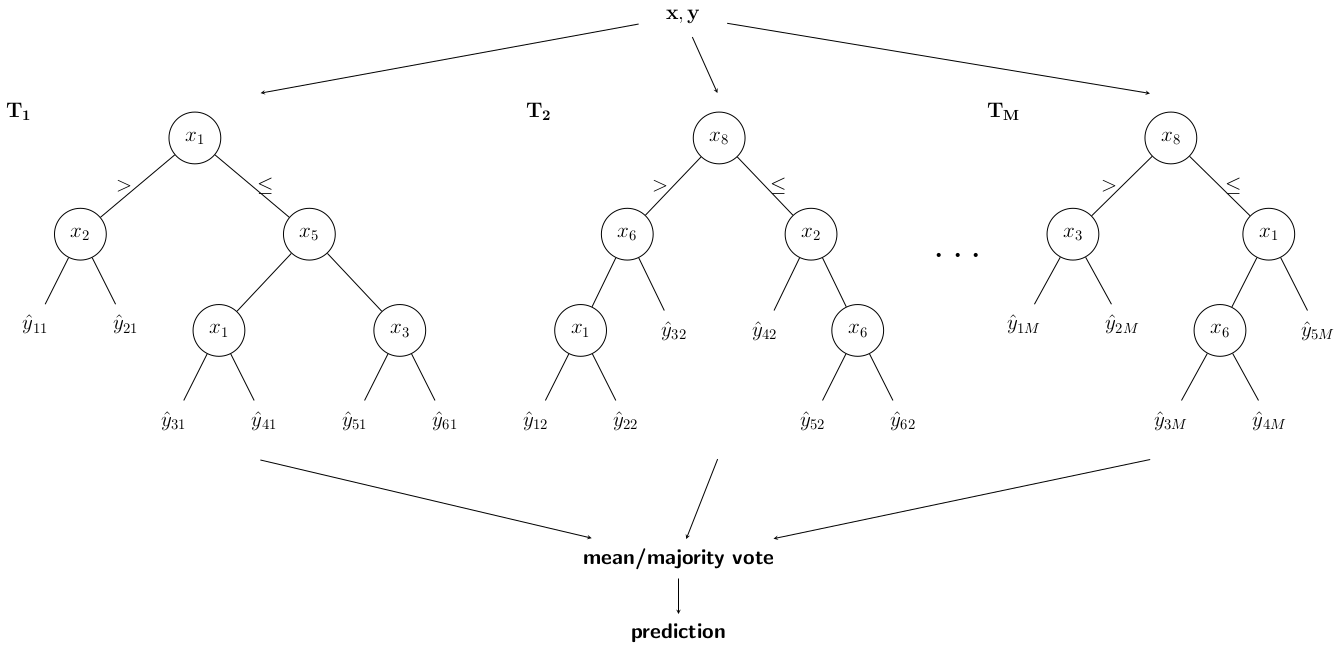

In [5]:
Image("../images/random_forest.png")
#<img alt="generated with latex" caption="Illustration of random forest" id="random_forest" #src="../images/random_forest.png">


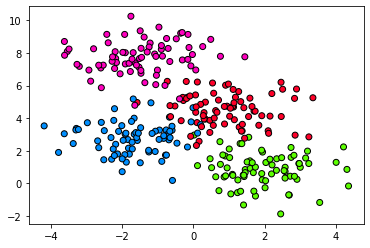

In [2]:
######################################################################
## random forest
######################################################################
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from matplotlib.patches import Polygon
from itertools import chain
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

plot_step = 0.02 

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step)) 
n_estimators = 31 
  
mycmap=plt.cm.Paired
mycmap=plt.cm.Paired
colors = [mycmap(1), mycmap(3), mycmap(6), mycmap(9)]
base = plt.cm.get_cmap('gist_rainbow')
cmap = plt.cm.Reds
redc = (0.99, 0.96078431372549022, 0.94117647058823528, 0.1)

idx0 = np.where(y==0)[0]
idx1 = np.where(y==1)[0]
idx2 = np.where(y==2)[0]
idx3 = np.where(y==3)[0]


fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1], c=y,  cmap=base, edgecolors = 'k')

def init():
    return []
         
clf = RandomForestClassifier(n_estimators = 0,max_depth=3, max_samples = 50, warm_start=True)

In [7]:
def run(j):
    if j > n_estimators:
        return
    clf.set_params(n_estimators=int(j) + 1)
    clf.fit(X, y)    
    Z = clf.estimators_[j].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.scatter(X[:, 0], X[:, 1], c = y, cmap=base, edgecolors = 'k')
    
    cont = ax.contourf(xx, yy, Z, cmap = base, alpha=0.1)

    return [cont]

ani = animation.FuncAnimation(fig, func = run, init_func = init, frames = list(np.arange(0, n_estimators)) + [n_estimators] * 2,
                       interval = 300,  blit = False) 
HTML(ani.to_jshtml())    

## Some more theory on optimization

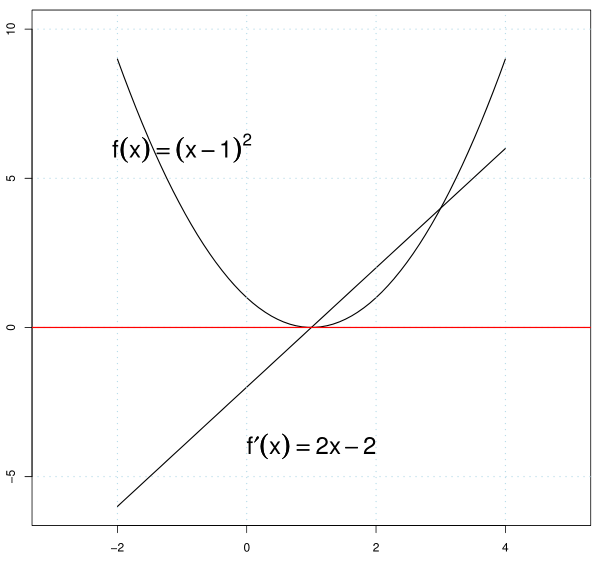

In [8]:
Image('../images/first_derivative.png')

### Newton-Raphson method

This is an iterative algorithm for finding the minimum of a function. <br>
Suppose we want to find the tangent to a point $f(x_0)$ on our quadratic-loss function. The formula for the tangent at this point is (basically it is just a linear equation - as we used in regression):<br>

\begin{equation}
y = f'(x_0) x + f(x_0),
\end{equation}
where $f'(x_0)$ is the first derivative - the gradient, the slope. And $f(x_0)$ is the y-value of the function.<br>

Now, suppose we want to find the point where our linear equation (the tangent) intersects the x-axis. We have to find the point $x_{intersect}$, that can be expressed as a difference to the actual point: $(x_1 - x_0)$. Since the y-value at this intersection point is $0$, we can write:

\begin{eqnarray*}
f'(x_0) (x_1 - x_0) + f(x_0) =& 0 \\
(x_1 - x_0) =& -\frac{f(x_0)}{f'(x_0)} \\
x_1 =& x_0 - \frac{f(x_0)}{f'(x_0)} \\
\end{eqnarray*}

If our loss-function is quadratic, repeating the whole procedure $n+1$ times will drive the new x-value $x_{n+1}$ ever nearer to the minimum.<br>

Text(-5, 50, "$x_1 = x_0 - \\frac{f(x_0)}{f'(x_0)}$")

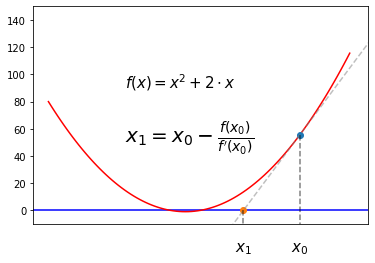

In [48]:
f = lambda x : x**2 + 2*x
f_ = lambda x : 2*x + 2

x = np.arange(-10, 10, 0.2)
y = f(x)
w = [6.5]
fig, axes= plt.subplots()
#fig = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='', 
          fontdict={'fontsize':15})
#axes = fig.add_subplots()
axes.set_xlim([-11, 11])
axes.set_ylim([-10, 150])
axes.set_xticks([])
axes.axhline(y = 0.0, color = 'b', linestyle = '-')
axes.plot(x, y, 'r')

# arbitrary point on error-curve
axes.plot(w[0], f(w[0]),'o')
# where tangent intercepts x-axis at y=0
axes.plot(w[0]-(f(w[0])/f_(w[0])), 0, 'o')
# tangent
# y = slope * x + a
# a = y - (slope * x)
a = f(w[0]) - (f_(w[0]* w[0]))
#axes.plot([1, 10], [f_(w[0])*1 + a, f_(w[0])*10 + a], color='grey', linestyle= '--', alpha=0.5)
axes.plot([w[0]-5.5, w[0]+6.5], [f(w[0])-5.5 * f_(w[0]), f(w[0])+6.5 * f_(w[0])], color='grey', linestyle= '--', alpha=0.5)
#axes.plot([1, 10], [f(w[0]) - 3 * f_(w[0]), f(w[0]) + 3 * f_(w[0])], color='grey', linestyle= '--', alpha=0.5)
axes.plot([w[0]-(f(w[0])/f_(w[0]))]*2, [0, -10], color='black', linestyle='--', alpha=0.5)
axes.plot([w[0]]*2, [f(w[0]), -10], color='black', linestyle='--', alpha=0.5)
axes.text(w[0]-(f(w[0])/f_(w[0])), -30, r"$x_1$", horizontalalignment ='center', fontsize = 15)
axes.text(w[0], -30, r"$x_0$", horizontalalignment ='center', fontsize = 15)
axes.text(-5, 90, r"$f(x) = x^2 + 2\cdot x$", horizontalalignment ='left', fontsize = 15)
axes.text(-5, 50, r"$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$", horizontalalignment ='left', fontsize = 20)

This is basically __gradient descent__. It is called __stochastic gradient descent__ when the $(x_i, y_i)$ pairs used to compute the loss are a subsample of the whole data-set.<br>
Next, we introduce a __learn-parameter__ __$\alpha$__ that restricts the step-width in each update step:

\begin{equation}
x_{n+1} = x_n - \alpha \frac{f(x_n)}{f'(x_n)}
\end{equation}

# Gradient Descent with small learning rate $\alpha=0.15$

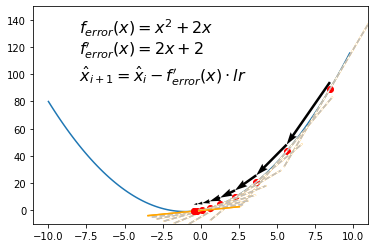

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import matplotlib.animation as animation
from IPython.display import HTML

x = np.arange(-10, 10, 0.2)
y = x**2 + 2*x

fig, axes= plt.subplots()
#axes=fig.add_subplot(111)
axes.set_xlim([-11, 11])
axes.set_ylim([-10, 150])
axes.plot(x,y)
axes.annotate(xy=(-8, 130), s = '$f_{error}(x) = x^2 + 2x$', fontsize=16)
axes.annotate(xy=(-8, 115), s = '$f_{error}\'(x) = 2x + 2$', fontsize=16)
axes.annotate(xy=(-8, 95), s = '$\hat{x}_{i+1} = \hat{x}_i - f_{error}\'(x) \cdot lr$', fontsize=16)

# function and derivative
f = lambda x : x**2 + 2*x
f_ = lambda x : 2*x + 2

w = [8.5]

def init():
    return []

alpha = 0.15 #0.7
iter = 1

def run(j):   
    

    if j > 1:
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='white',
              linestyle = '-')
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='grey',
              linestyle = '--', alpha = 0.5 )
    axes.plot([w[-1]-3, w[-1]+3], [f(w[-1]) - 3*f_(w[-1]), f(w[-1]) + 3*f_(w[-1])], color='orange',
              linestyle = '-')

        
    axes.plot(w[-1], f(w[-1]), 'ro')
    new_w = w[-1] - alpha * f_(w[-1])

    if abs(new_w -w[-1]) < 0.2:
        return
    w.append(new_w)
    axes.quiver(w[-2], f(w[-2])+ 5, -alpha * f_(w[-2]), f(w[-1])- f(w[-2]),
               scale_units='xy', angles='xy', scale=1)
    return axes

ani = animation.FuncAnimation(fig, func = run, init_func = init,
                              frames = (i+1 for i in range(10)),
                       interval = 1000,  blit = False) 
HTML(ani.to_jshtml())


# Gradient Descent with large learning rate $\alpha=0.75$

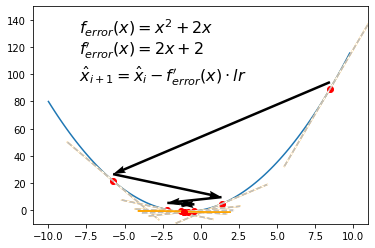

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
import matplotlib.animation as animation
from IPython.display import HTML

x = np.arange(-10, 10, 0.2)
y = x**2 + 2*x

fig, axes= plt.subplots()
#axes=fig.add_subplot(111)
axes.set_xlim([-11, 11])
axes.set_ylim([-10, 150])
axes.plot(x,y)
axes.annotate(xy=(-8, 130), s = '$f_{error}(x) = x^2 + 2x$', fontsize=16)
axes.annotate(xy=(-8, 115), s = '$f_{error}\'(x) = 2x + 2$', fontsize=16)
axes.annotate(xy=(-8, 95), s = '$\hat{x}_{i+1} = \hat{x}_i - f_{error}\'(x) \cdot lr$', fontsize=16)

# function and derivative
f = lambda x : x**2 + 2*x
f_ = lambda x : 2*x + 2

w = [8.5]

def init():
    return []

alpha = 0.75
iter = 1

def run(j):   
    

    if j > 1:
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='white',
              linestyle = '-')
        axes.plot([w[-2]-3, w[-2]+3], [f(w[-2]) - 3*f_(w[-2]), f(w[-2]) + 3*f_(w[-2])], color='grey',
              linestyle = '--', alpha = 0.5 )
    axes.plot([w[-1]-3, w[-1]+3], [f(w[-1]) - 3*f_(w[-1]), f(w[-1]) + 3*f_(w[-1])], color='orange',
              linestyle = '-')

        
    axes.plot(w[-1], f(w[-1]), 'ro')
    new_w = w[-1] - alpha * f_(w[-1])

    if abs(new_w -w[-1]) < 0.2:
        return
    w.append(new_w)
    axes.quiver(w[-2], f(w[-2])+ 5, -alpha * f_(w[-2]), f(w[-1])- f(w[-2]),
               scale_units='xy', angles='xy', scale=1)
    return axes

ani = animation.FuncAnimation(fig, func = run, init_func = init,
                              frames = (i+1 for i in range(10)),
                       interval = 1000,  blit = False) 
HTML(ani.to_jshtml())


The literatur treating the mathematical aspects around gradient boosting is still patchy and not very approachable. For a formal derivation (or justification) of the method, we need the concepts of __likelihood__ and __Taylor-Series__.<br>

### Likelihood

One method to judge about the goodness of an estimator at hand, is to ask: how likely is the observed data, given the estimate? Or, how likely are our estimates to have generated the observed data?<br>

For example the standard normal distribution
\begin{eqnarray*}
f(y| \mu, \sigma) =& (2\pi \sigma^2)^{-\frac{1}{2}} \exp\left(-\frac{1}{2 \sigma^2}(x - \mu)^2\right) 
\end{eqnarray*}<br>
We estimate $\mu$ and sum the probability densities over our sample; it is common to take the logarithm of the likelihood - we speak of log-likelihood: <br>

\begin{equation}
\ell(\mu, \sigma^2, \mathbf{x}) = -\frac{n}{2}\log (2\pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n(x_i - \hat{\mu})^2
\end{equation}

The first two parts of the likelihood do not depend on $\mu$, so we can savely ignore them - they are constants.<br>

\begin{equation}
\ell(\hat{\mu}, \hat{\sigma}^2, \mathbf{x}) = -\frac{1}{2\hat{\sigma}^2}\sum_{i=1}^n(x_i - \hat{\mu})^2
\end{equation}
This Likelihood has to be maximised, i.e. we have to estimate the parameters $\hat{\sigma}^2$ and $\hat{\mu}$ in a way that they are more likely to have been the parameters that generated our data-sample.





### Taylor-Series
For more information see the [wikipedia article](https://en.wikipedia.org/wiki/Taylor_series): "In mathematics, the Taylor series of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point. For most common functions, the function and the sum of its Taylor series are equal near this point."<br>
The Taylor-Series for our function $f(x)$ at the point $x_0$ is given by:

\begin{equation}
f(x) \approx f(x_0) + \frac{f'(x_0)}{1!}(x - x_0) + \frac{f''(x_0)}{2!}(x - x_0)^2 + \ldots
\end{equation}

The terms $\frac{1}{1!}$, $\frac{1}{2!}$, $\ldots$ are normaly skipped, because this are constants. Also, most often the Series is expanded to only 2nd order - subsequent terms are not contributing so much to the approximation. <br>

\begin{equation}
f(x) \approx f(x_0) + f'(x_0)(x - x_0) + f''(x_0)(x - x_0)^2 + \ldots
\end{equation}

### Newton's method
Here, we have a current estimate $x_0$ and the real value $x$ that we want to find in our iterative optimization process.<br>

Now, suppose the function $f(x)$ is our error that we want to minimize. We set the derivative with respect to $(x - x_0)$ to zero and solve for $x$:

\begin{eqnarray*}
f'(x_0) + f''(x_0)(x - x_0) =& 0\\
(x - x_0) =& -\frac{f'(x_0)}{f''(x_0)}\\
x = & x_0 - \frac{f'(x_0)}{f''(x_0)}\\
\end{eqnarray*}

Again, as with the tangent-method, we introduce a __learn-parameter $\alpha$__:

\begin{equation}
x_{n+1} = x_n - \alpha \frac{f'(x_n)}{f''(x_n)}
\end{equation}

This algorithm usually converges in fewer steps than the tangent-method, because it includes information about the curvature (2nd derivative) of our loss-function. This is why methods containing these terms are also called __2nd order methods__.

# Gradient Boosted Trees


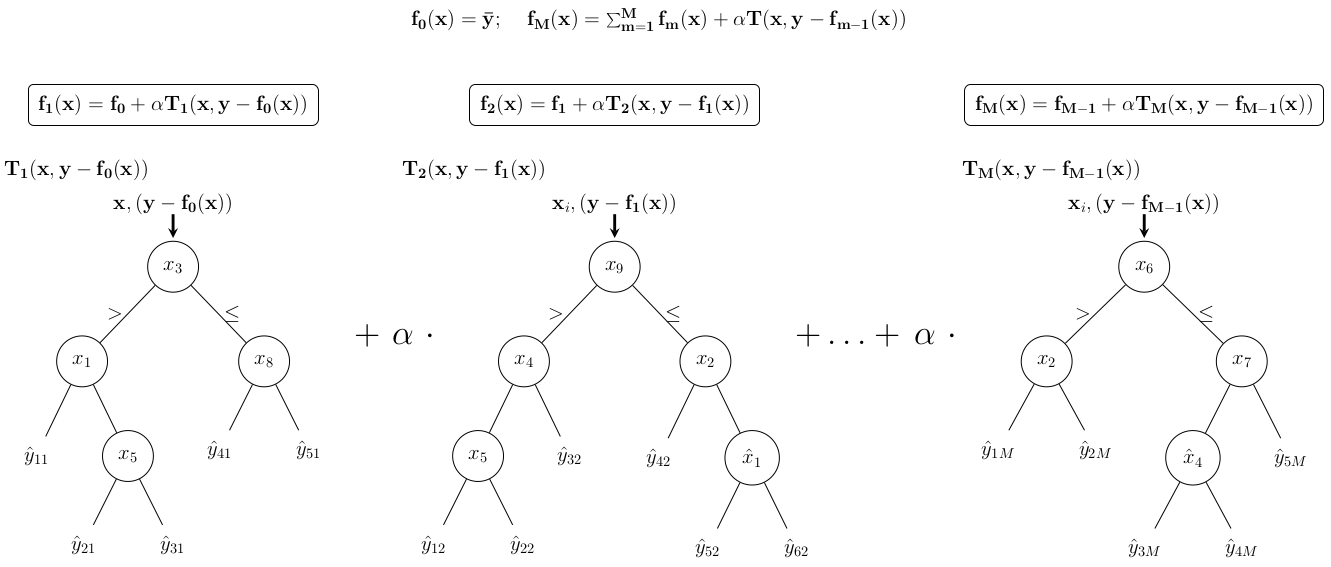

In [11]:
Image("../images/gbm.png")
#<img alt="generated with latex" caption="The gradient boosting algorithm" id="gradient_boosting" #src="../images/gbm.png">

### Derivation of the optimal update formula for trees:
We try to make sense of the formulae explained [here](https://drive.google.com/file/d/0B0c0MbnP6Nn-eUNRRkVOOGpkbFk/view?resourcekey=0-nVw3WhovKW5FPvPM5GPHfg), starting at page 3:

\begin{equation}
\mathcal{L} = \sum_{i=1}^n \ell(y_i, \hat{y}_i)
\end{equation}

The first important thing to note here: The way, the likelihood-function is composed here is different from the usual approach. Usually, we are estimating distribution parameters as $\mu$ or $\sigma^2$ and compute the Likelihood of the observed data given our estimates.<br>
Now, every single $\hat{y}_i$ is treated as a belonging to its own population with the $\mu$ given by $y_i$. The overall Liklihood is the sum of the contributions of the single data-point pairs $(\hat{y}_i, y_i)$.<br>

Remember the Taylor-Series expansion:
\begin{equation}
f(x) \approx f(x_0) + f'(x_0)(x - x_0) + f''(x_0)(x - x_0)^2 + \ldots
\end{equation}

Instead of searching the next step $(x - x_0)$ that minimizes our function, we are looking for the next tree to add, that maximizes our log-likelihood (or minimizes our negative log-likelihood):

\begin{equation}
\mathcal{L}^t = \sum_{i=1}^n \ell\left(y, y_i^{t-1} + f_t(\mathbf{x_i})\right), 
\end{equation}
where $f_t(\mathbf{x_i})$ is the next tree-prediction added.<br>

In a somewhat sloppy manner we could write the Taylor-Series expansion as:

\begin{equation}
\mathcal{L}^t \approx \ell(y, y_i^{t-1}) + \ell'(y, y_i^{t-1})f_t(\mathbf{x_i}) + \frac{1}{2}\ell''(y, y_i^{t-1})f_t(\mathbf{x_i})^2
\end{equation}

Please note:
   - In the former usage of the Taylor-Series, we dropped the $\frac{1}{1!}$, $\frac{1}{2!}$, $\ldots$ terms. Now they are included.
   - the derivative is with respect to $\hat{y}_i$; As we said, this is our estimate of $\mu_i$. And we want to estimate this parameter as to maximize the likelihood of the data seen.


The best update-step is as before: 

\begin{equation}
f_t^j(\mathbf{x_i}) = \omega_j = \sum_{i \in j}-\frac{\ell'(y, y_i^{t-1})}{\ell''(y, y_i^{t-1})} = -\frac{G_j}{H_j},
\end{equation}
with $G_j$ being the gradient and $H_j$ the hessian matrix (second derivatives).<br>
This is the best contribution-step of leaf $j$.<br>

__please note the usage of $\omega$ here__: This is because, in the gradient-boosting literature, the updates are called __weights__.

### example
Remember the likelihood function for the normal case - we are doing gradient boosting __regression__:

\begin{equation}
\ell(\hat{y}, \hat{\sigma}^2 = 1, y) = -\frac{1}{2}\sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}

We show what the derivatives are like for one leaf $j$ of the tree:

\begin{eqnarray*}
\frac{\partial \ell(\hat{y}, \hat{\sigma}^2 = 1, y)}{\partial \hat{y}_i} =& \sum_{i\in j}(y_i - \hat{y}_i)\\
\frac{\partial^2 \ell(\hat{y}, \hat{\sigma}^2 = 1, y)}{\partial^2 \hat{y}_i} =& \sum_{i\in j} -1\\
-\frac{G_j}{H_j} =& \sum_{i \in j} \frac{(y_i - \hat{y}_i)}{1} = \sum_{i\in j} (y_i - \hat{y}_i)
\end{eqnarray*}

__This result is very important because it basically says that the sum of the former trees has to be updated with the residuals of the single observations. So the contribution of each leaf-node is the average of the residuals within this leaf.__<br>

### The gradient boosting regression algorithm in other words: 
"Take the x-variables and try to find a split that sortes similar residuals into the same node."


### adding regularization
By adding $L_1$ and $L_2$ regularization terms to the weights, splits leading to very pure leaves - including only very few cases - are discouraged. A plit has to contribute substantially to the overall likelihood improvement, if not the $L_1$ and/or $L_2$ penalties outweigh the positive effect of the split.

## most important parameters for stochastic gradient-boosting:
 - __learning_rate__: the factor $\alpha$ in the above graphic
 - __subsample__: takes part of the data without replacement; prevents overfitting
 - __feature_fraction__: select a subset of the features for the next tree; prevents overfitting
 - __num_leaves__: number of leaves; lightgbm fits level-wise and leaf-wise; prevents overfitting
 - __max_depth__: number of levels to grow the tree; prevents overfitting
 - __num_iterations__: number of trees to grow
 - __max_bin__: in lightgbm all features are discretized by binning them; the number of bins for a feature is given by __max_bin__ (this is what makes lightgbm super-fast)
 - __lambda_l1/lambda_l2__: regularizes the leaf-weights; __excurs__: the result assigned to all cases that end up in one leaf is called the weight; for regression this is a continuous value and also for classification since the result is ultimately passed through a sigmoid-function that assigns then values between 0 and 1; <br>
 
For a speed comparison between lightgbm and xgboost see e.g. [results from 2017](https://medium.com/implodinggradients/benchmarking-lightgbm-how-fast-is-lightgbm-vs-xgboost-15d224568031) Meanwhile xgboost catched up with lightgbm.<br>
A good paper, describing how the features of lightgbm have beed added to xgboost [is this one.](https://drive.google.com/file/d/0B0c0MbnP6Nn-eUNRRkVOOGpkbFk/view)<br>
Less mathematical however, is this report here: 
https://everdark.github.io/k9/notebooks/ml/gradient_boosting/gbt.nb.html#5_lightgbm